<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/30_Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mathematical Transformations

Mathematical transformations are techniques used to change the distribution of data. This is often done to make the data more suitable for certain statistical models or visualizations that assume a particular distribution, such as a normal distribution. Transformations can help to stabilize variance, make relationships between variables more linear, and reduce the impact of outliers.

### Function Transformer

The `FunctionTransformer` in scikit-learn is a versatile tool for applying arbitrary functions to your data. It allows you to define your own transformation function and apply it to your dataset. This is useful when standard transformations like log or square root are not sufficient or when you have a specific custom transformation you want to apply. It can be used for both numerical and categorical data, depending on the function you provide.

### How to find if the data is normal?

Several methods can be used to assess if your data follows a normal distribution:

*   **Histograms:** Visually inspecting a histogram of your data can give you a rough idea of its distribution. A bell-shaped curve suggests normality.
*   **Statistical tests:** Tests like the Shapiro-Wilk test or the D'Agostino K-squared test provide a statistical measure of normality. A low p-value from these tests indicates that the data is unlikely to be normally distributed.
*   **QQ Plots:** Quantile-Quantile plots are a graphical method for comparing the distribution of your data to a theoretical distribution, such as the normal distribution.

### QQ Plots

A QQ plot compares the quantiles of your data to the quantiles of a theoretical distribution. If your data follows the theoretical distribution, the points on the QQ plot will fall approximately along a straight line. Deviations from the straight line indicate departures from the theoretical distribution. For assessing normality, you would compare your data's quantiles to those of a standard normal distribution.

### Log Transform

The log transform is a powerful transformation used to handle skewed data, particularly right-skewed data. It compresses the larger values more than the smaller values, making the distribution more symmetrical and closer to normal. It is commonly applied to data that are strictly positive.

### Three more transforms

Beyond the log transform, there are several other common transformations:

### Reciprocal Transform

The reciprocal transform (1/x) is useful for data with a skewed distribution, especially when there are outliers with very large values. It inverts the data, which can help to pull in the large values and spread out the smaller ones. It's important to handle zero values carefully when applying this transform.

### Square Transform

The square transform ($x^2$) can be used to address left-skewed data. It expands the larger values more than the smaller values, potentially making the distribution more symmetrical.

In summary, understanding and applying mathematical transformations is a crucial step in data preprocessing to prepare your data for analysis and modeling. The choice of transformation depends on the specific characteristics of your data and the goals of your analysis.

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv("/content/titanic.csv", usecols=["Age","Fare","Survived"])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

/tmp/ipython-input-1809399462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x ,y ,test_size = 0.2, random_state=42)

/tmp/ipython-input-4214968055.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


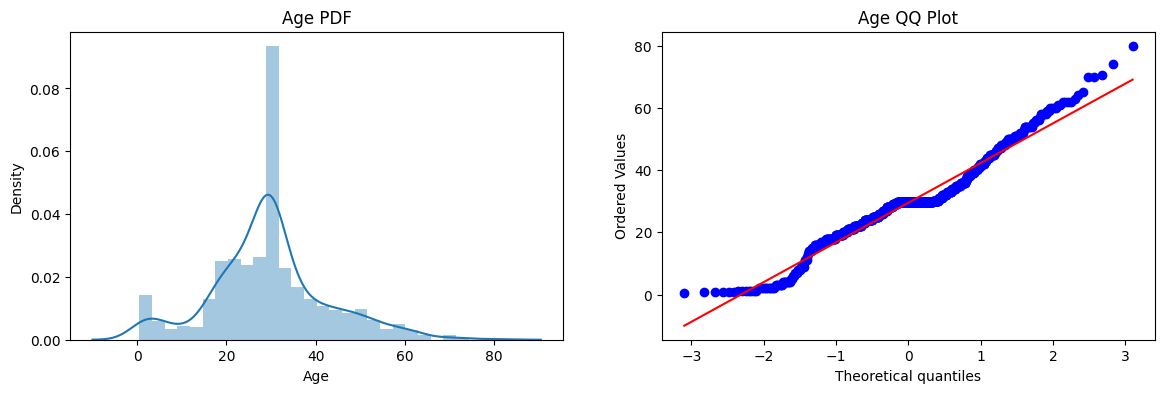

In [ ]:

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipython-input-3189712168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


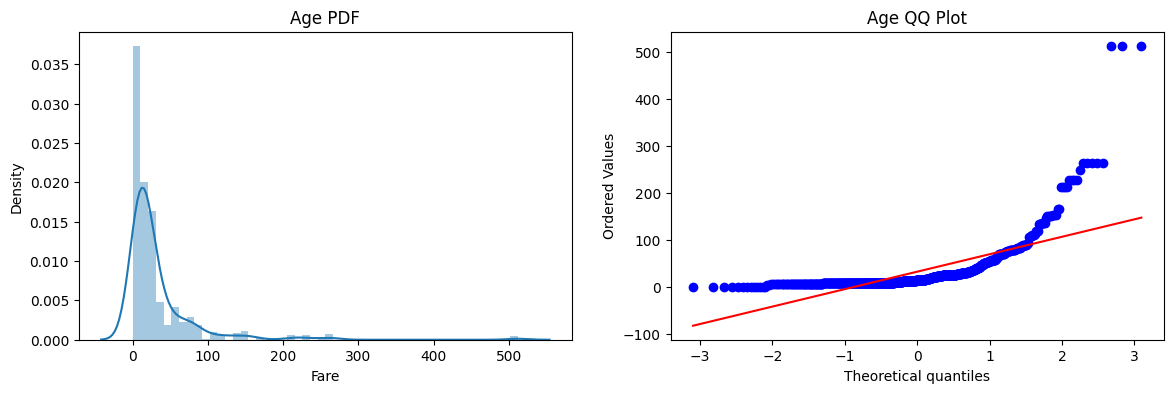

In [ ]:

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.664804469273743


In [ ]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743


In [ ]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577403245942571


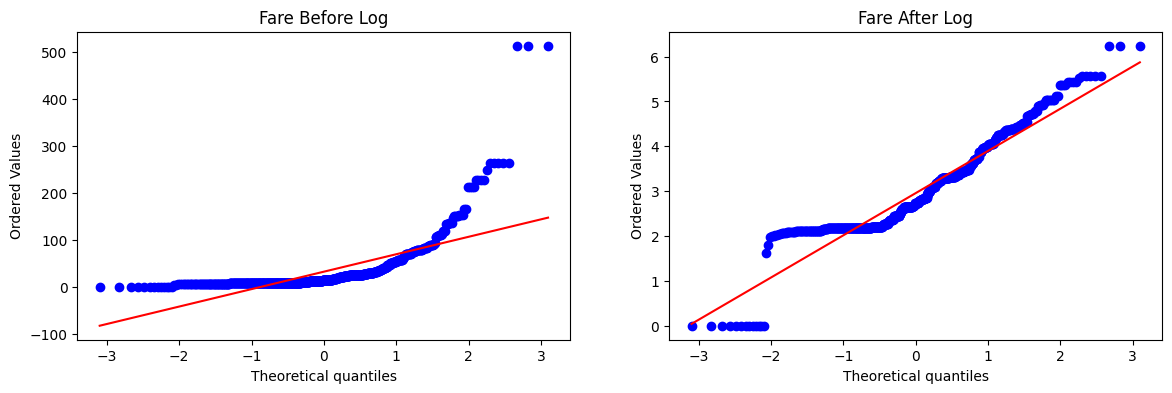

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

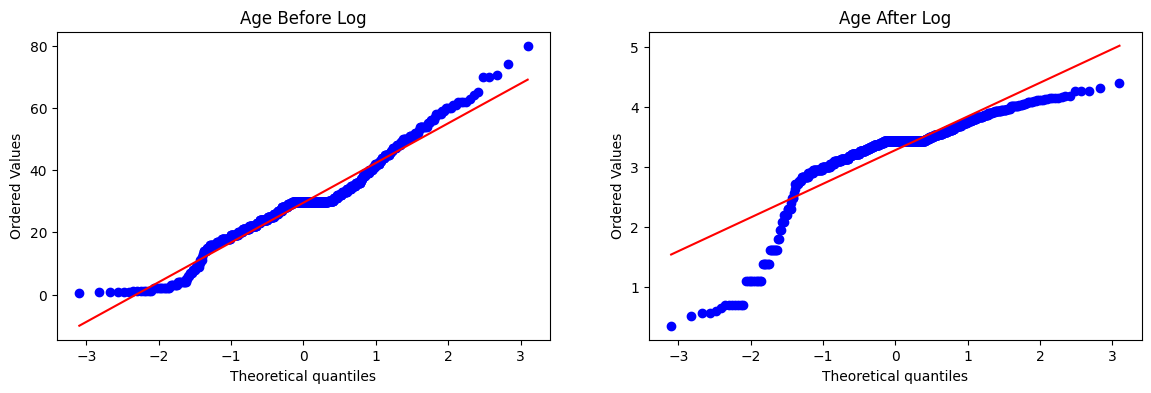

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [ ]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577153558052434


In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


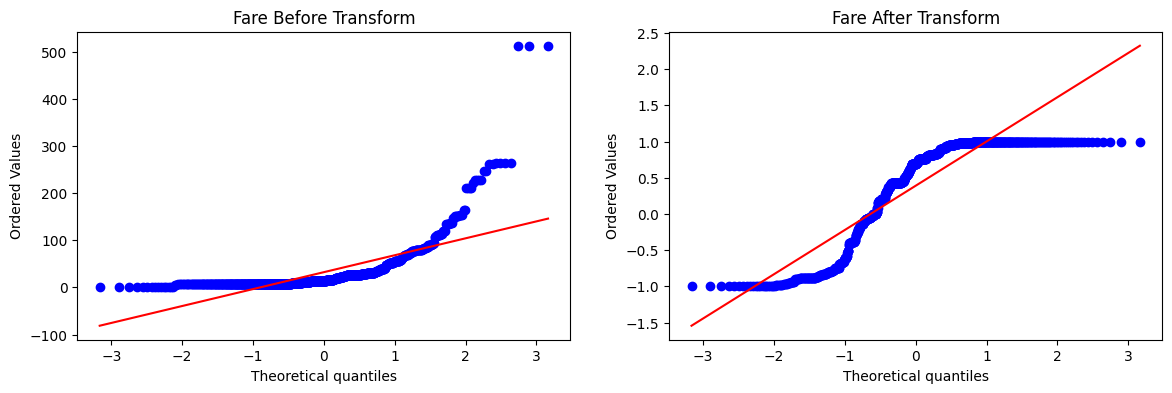

In [ ]:
apply_transform(np.sin)